In [1]:
import numpy as np # linear algebra
import spacy
nlp = spacy.load('en_core_web_sm')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from nltk.corpus import stopwords
import nltk
import heapq
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
stopwords = stopwords.words('english')
sns.set_context('notebook')

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

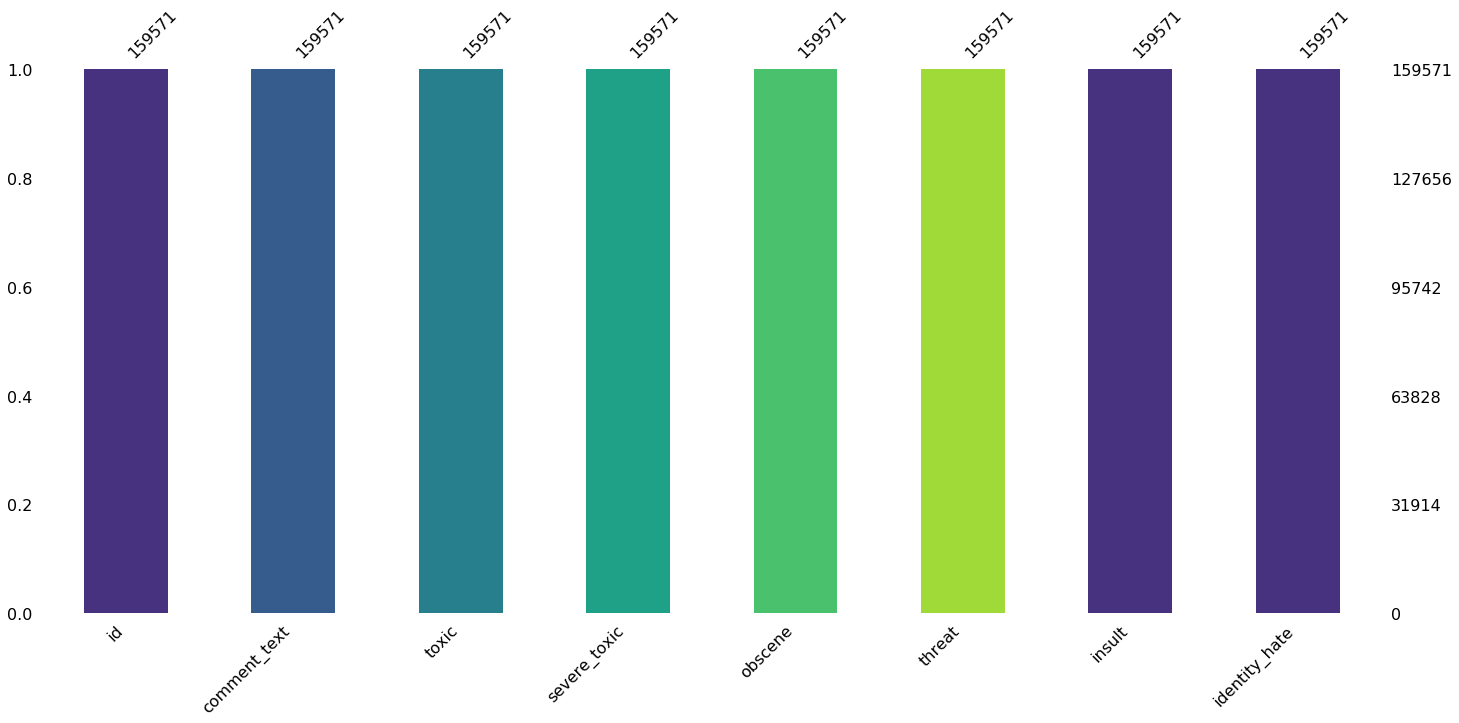

In [5]:
import missingno as msno
msno.bar(df,color= sns.color_palette('viridis'))

In [6]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [7]:
df.toxic.sum(),df.severe_toxic.sum(),df.obscene.sum(),df.threat.sum(),df.insult.sum(),df.identity_hate.sum()

(15294, 1595, 8449, 478, 7877, 1405)

In [8]:
print("Percentage of comments which are toxic in nature:",(df.toxic.sum()/df.toxic.count())*100)
print("Percentage of comments which are severe_toxic in nature:",(df.severe_toxic.sum()/df.severe_toxic.count())*100)
print("Percentage of comments which are obscene in nature:",(df.obscene.sum()/df.obscene.count())*100)
print("Percentage of comments which are threat in nature:",(df.threat.sum()/df.threat.count())*100)
print("Percentage of comments which are insult in nature:",(df.insult.sum()/df.insult.count())*100)
print("Percentage of comments which are identity_hate in nature:",(df.identity_hate.sum()/df.identity_hate.count())*100)

Percentage of comments which are toxic in nature: 9.584448302009765
Percentage of comments which are severe_toxic in nature: 0.9995550569965721
Percentage of comments which are obscene in nature: 5.2948217407925
Percentage of comments which are threat in nature: 0.2995531769557125
Percentage of comments which are insult in nature: 4.936360616904074
Percentage of comments which are identity_hate in nature: 0.8804858025581089


Thus from above we can understand that out of all comments only 20% comments are negative in nature. Remaining 80 are fine.

# TOXIC

lets try to understand what type of comments are categorized as toxic in nature.

In [9]:
df[df['toxic']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
44,001956c382006abd,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0,0,0,0,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0
58,0021fe88bc4da3e6,My Band Page's deletion. You thought I was gon...,1,0,1,0,0,0


From the above we can understand that a comment can fall under more than one category. For example comment from index=6, is toxic,
severe_Toxic , obscene along with insulting.

So lets see which comments are only toxic , and does not fall under any other category.

In [10]:
df_toxic=df[(df['toxic']==1)&(df['severe_toxic']==0)&(df['obscene']==0)&(df['threat']==0)&(df['insult']==0)&(df['identity_hate']==0)]

In [11]:
df_toxic

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
44,001956c382006abd,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0,0,0,0,0
59,002264ea4d5f2887,Why can't you believe how fat Artie is? Did yo...,1,0,0,0,0,0
151,005f59485fcddeb0,"""\n\nSORRY PUCK BUT NO ONE EVER SAID DICK WAS ...",1,0,0,0,0,0
159,00637960a7ec3436,"""\n\nUNBLOCK ME OR I'LL GET MY LAWYERS ON TO Y...",1,0,0,0,0,0
206,0082b5a7b4a67da2,Give me a permanat block raseac....!!! remembe...,1,0,0,0,0,0
268,00ab65775c601cf9,Atheism is full of bias shit,1,0,0,0,0,0
278,00afb4dec99a231f,Hey why you are spreading misconceptions and t...,1,0,0,0,0,0
286,00b77cb600c897b4,"""\n\nAnd you are? Let me know when you've craw...",1,0,0,0,0,0


Fine , so now we are getting 5666 comments which are only toxic in nature. Lets check 1 and 2 comment manually then we will plot 
the word cloud to check if we can find any specific words which are solely responsible for making the comment toxic

In [12]:
df['comment_text'][12]

'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...'

In [13]:
df['comment_text'][16]

"Bye! \n\nDon't look, come or think of comming back! Tosser."

In [14]:
df['comment_text'][44]

"I'm Sorry \n\nI'm sorry I screwed around with someones talk page.  It was very bad to do.  I know how having the templates on their talk page helps you assert your dominance over them.  I know I should bow down to the almighty administrators.  But then again, I'm going to go play outside....with your mom.   76.122.79.82"

In [15]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [16]:
doc = nlp(df["comment_text"][16])
spacy.displacy.render(doc, style='ent',jupyter=True)

In [17]:
doc = nlp(df["comment_text"][44])
spacy.displacy.render(doc, style='ent',jupyter=True)

In [18]:
from nltk.stem import PorterStemmer

In [19]:
porter = PorterStemmer()
df_toxic['comment_text']=df_toxic['comment_text'].astype(str)
df_toxic['comment_text']=df_toxic['comment_text'].apply(lambda x:porter.stem(x))

In [20]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emondsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df_toxic['comment_text']=df_toxic['comment_text'].apply(lambda x:lemmatizer.lemmatize(x))


In [22]:
df_toxic['comment_text'][16]

"bye! \n\ndon't look, come or think of comming back! tosser."

In [23]:
#df_toxic['comment_text']=df_toxic['comment_text'].astype(str)
toxic_corpus=' '.join(df_toxic['comment_text'])

In [24]:
toxic_corpus

'hey... what is it..\n@ | talk .\nwhat is it... an exclusive group of some wp talibans...who are good at destroying, self-appointed purist who gang up any one who asks them questions abt their anti-social and destructive (non)-contribution at wp?\n\nask sityush to clean up his behavior than issue me nonsensical warnings... bye! \n\ndon\'t look, come or think of comming back! tosser. i\'m sorry \n\ni\'m sorry i screwed around with someones talk page.  it was very bad to do.  i know how having the templates on their talk page helps you assert your dominance over them.  i know i should bow down to the almighty administrators.  but then again, i\'m going to go play outside....with your mom.   76.122.79.82 why can\'t you believe how fat artie is? did you see him on his recent appearence on the tonight show with jay leno? he looks absolutely awful! if i had to put money on it, i\'d say that artie lange is a can\'t miss candidate for the 2007 dead pool!   \n\n  \nkindly keep your malicious fi

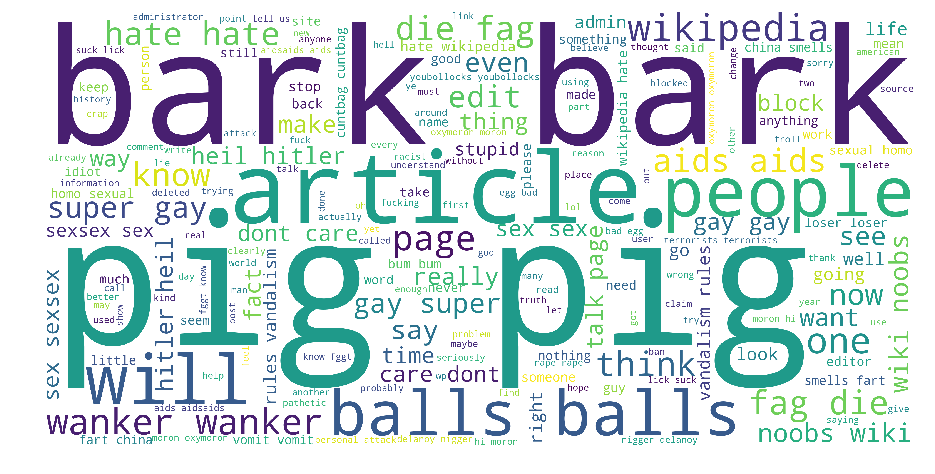

In [25]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(toxic_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

So the comments which are leading it to become a toxic comments has balls(slang) , bark(comparison with dog), pig(kind of slang),hate
fag, die etc. This are not that serious so kept under first catergory.i:e toxic

# SEVERE_TOXIC

In [26]:
df_sev_toxic=df[(df['toxic']==0)&(df['severe_toxic']==1)&(df['obscene']==0)&(df['threat']==0)&(df['insult']==0)&(df['identity_hate']==0)]

In [27]:
df_sev_toxic

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [28]:
df_sev_toxic=df[(df['toxic']==1)&(df['severe_toxic']==1)&(df['obscene']==0)&(df['threat']==0)&(df['insult']==0)&(df['identity_hate']==0)]

In [29]:
df_sev_toxic.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
4894,0cf5e967ded97d37,so everytime i reset my modem my ip changes\n\...,1,1,0,0,0,0
5610,0efdedac6cc0a8db,hello\nmother fucker hijo edputa,1,1,0,0,0,0
8326,16235f5ddce28a61,Paul Tibbit is a fucking-ass little piece of s...,1,1,0,0,0,0
12861,2215d63992760558,"NOT REALLY, GO AHEAD AND FUCK OFF BITCH!!!",1,1,0,0,0,0
18147,2fefda078c74afb3,Your a dick head!! \n\nHow dare you go around ...,1,1,0,0,0,0


Yeah ofcourse if a comment is severely toxic it have to be toxic too. That is the reason why only severe_toxic=1 i not present. 
It will be intresting to see what words create the difference between toxic and toxic+sev_toxic

In [30]:
df_sev_toxic['comment_text'][4894]

"so everytime i reset my modem my ip changes\n\nfuck you petty sexless ugly ass desperate no life.. no status in society anal retentive wiki admins\n\n(the site is great.. but the lower level admins have no life and can't handle the little authority they have.. it tells you how small and pathetic their lives are)\n\nif i get blocked ill be on in 20 seconds with a new ip or the pizza is free.\n\ncheers."

In [31]:
df_sev_toxic['comment_text'][5610]

'hello\nmother fucker hijo edputa'

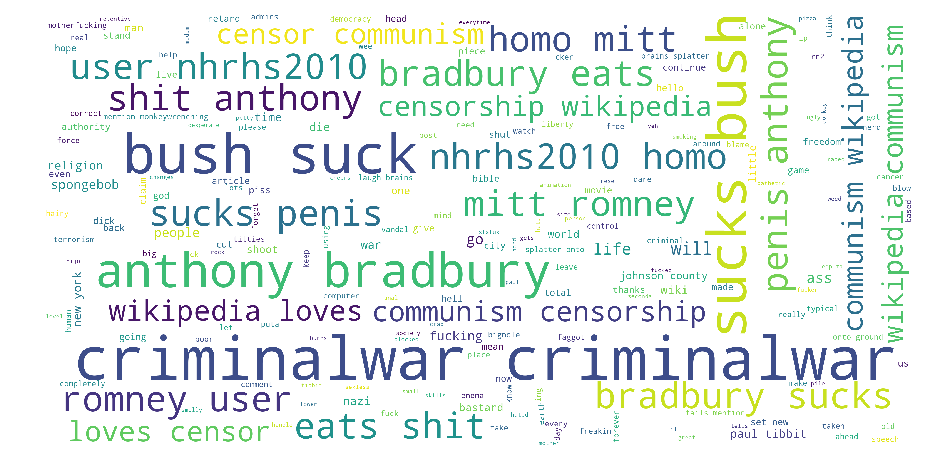

In [32]:
df_sev_toxic['comment_text']=df_sev_toxic['comment_text'].astype(str)
df_sev_toxic['comment_text']=df_sev_toxic['comment_text'].apply(lambda x:porter.stem(x))
df_sev_toxic['comment_text']=df_sev_toxic['comment_text'].apply(lambda x:lemmatizer.lemmatize(x))
sev_toxic_corpus=' '.join(df_sev_toxic['comment_text'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(sev_toxic_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

So the comments which are leading it to become a severly toxic comments has penis, eats shit, suck ,etc kind of words.

In [33]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

# obscene

In [34]:
df_obs=df[(df['toxic']==0)&(df['severe_toxic']==0)&(df['obscene']==1)&(df['threat']==0)&(df['insult']==0)&(df['identity_hate']==0)]

In [35]:
df_obs

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
527,01625cc84c6ef15b,How do you know he is dead. Its just his plan...,0,0,1,0,0,0
1232,0350c82d1f207e0e,Bleh. I'm all out of ideas. Is there really so...,0,0,1,0,0,0
1555,042e184200690387,{{unblock|i said im sorry......how do u expect...,0,0,1,0,0,0
1697,049aa7969ccd93ff,"""\n\nAs for the arguements that abo should be ...",0,0,1,0,0,0
1888,051ef2d095a230cd,I wish to restate the AN thread as neutral and...,0,0,1,0,0,0
2593,06f0b97018548ab9,jd2718 the sock fiend \n\nnow hes lying out hi...,0,0,1,0,0,0
3056,08429185c204220e,Ram it up ur ass very hard till ur eyes water,0,0,1,0,0,0
3610,09adcc22a0101c87,You might try to deflate your ego a bit and st...,0,0,1,0,0,0
4111,0af917a314be5d46,"""\n\n Ahem, wtf are u talking about sire? I do...",0,0,1,0,0,0
4449,0bd6ce0e0bbafd9e,"""\n\nYes, the money quote is that I'm fucking ...",0,0,1,0,0,0


In [36]:
df_obs['comment_text'][527]

'How do you know he is dead.  Its just his plane that crashed.  Jeezz, quit busting his nuts, folks.'

In [37]:
df_obs['comment_text'][1232]

"Bleh. I'm all out of ideas. Is there really something wrong with the server or what? The damn thing won't work for me, either Helvetica_font_new.svg (my upload of Segoe UI was actually a PNG to begin with...)"

In [38]:
df_obs['comment_text'][1555]

'{{unblock|i said im sorry......how do u expect me to stop making accounts if u dont unblock me.....if u unblock me,ill stop making acounts...simple...........ur the ones who are making something bad to worse.....stop making a big deal...im not doing anything bad or violating anything now,so i dont get it,why am i still blocked....just get over it already.......i mean well.....im not here do violate anything.......im just trying to help.......and can someone tell alexandria to unblockme already......this block is so fucking overrated.....cant u just forgive and forget.....move on people....there are other things to worry about than a stupid block...so unblock me and MOVE ON........again,i come in peace......and i have a right to contribute to wikipedia.....what happend in the past happend....the past is in the past.....now were the present......lets open a new page and start a new chapter.....star fresh..ok..deal..??.......i promise i wont violate anything.....all im asking is another 

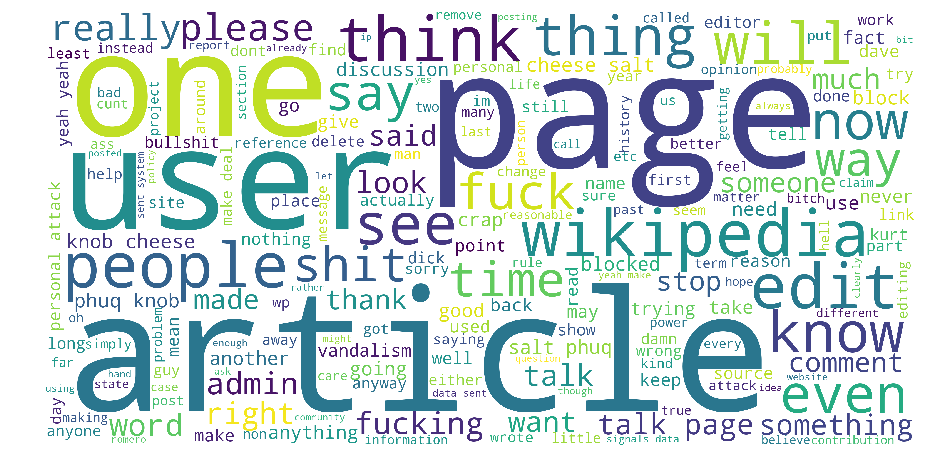

In [39]:
df_obs['comment_text']=df_obs['comment_text'].astype(str)
df_obs['comment_text']=df_obs['comment_text'].apply(lambda x:porter.stem(x))
df_obs['comment_text']=df_obs['comment_text'].apply(lambda x:lemmatizer.lemmatize(x))
obs_corpus=' '.join(df_obs['comment_text'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(obs_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

The words which are used mostly ar page and article which does not make much sense. However we have fuck , fucking, shit kind of word
which falls under obscene category.

In [40]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

# THREAT

In [41]:
df_thr=df[(df['toxic']==0)&(df['severe_toxic']==0)&(df['obscene']==0)&(df['threat']==1)&(df['insult']==0)&(df['identity_hate']==0)]

In [42]:
df_thr.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
3712,09eb7d87b8c24ca5,Please stop. If you continue to ignore our pol...,0,0,0,1,0,0
16939,2cb0ead532923065,That's funny. You was personally offended? So ...,0,0,0,1,0,0
17210,2d6e671ffae726a3,Wow dude. As your physician I suggest you sli...,0,0,0,1,0,0
29295,4db479fe05e88395,Regarding your passing \n\nBecause you willful...,0,0,0,1,0,0
48209,80e0b91bdea43fd3,personal attacks \n\ndont tell me what i can a...,0,0,0,1,0,0


In [43]:
df_thr['comment_text'][3712]

'Please stop. If you continue to ignore our policies by introducing inappropriate pages to Wikipedia, you will be blocked.'

In [44]:
df_thr['comment_text'][16939]

"That's funny. You was personally offended? So the bad things writer new you, your name etc, right? \nAnd one get offended by a comment, or epithets on a website, then that same person must grow up spiritually for some more 5 centuries at least.\nAnd if one get more offended by the previous comment, then that same person must kill him/hersef.\n\nTake care!"

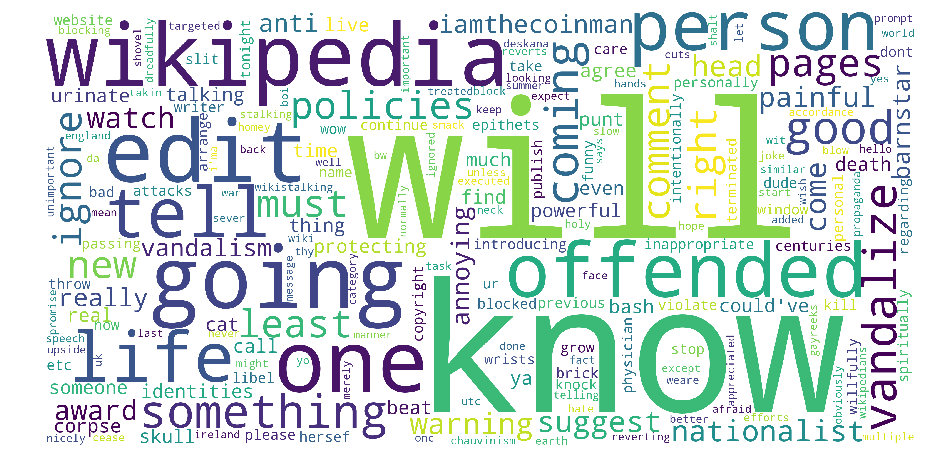

In [45]:
df_thr['comment_text']=df_thr['comment_text'].astype(str)
df_thr['comment_text']=df_thr['comment_text'].apply(lambda x:porter.stem(x))
df_thr['comment_text']=df_thr['comment_text'].apply(lambda x:lemmatizer.lemmatize(x))
thr_corpus=' '.join(df_thr['comment_text'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(thr_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

So the comments which are leading it to become a threat are "will, know, offended, life "etc kind of words. Mostly which I dont understand 
currently, let's see later if we can shed some more light on it.

# INSULT

In [46]:
df_ins=df[(df['toxic']==0)&(df['severe_toxic']==0)&(df['obscene']==0)&(df['threat']==0)&(df['insult']==1)&(df['identity_hate']==0)]

In [47]:
df_ins

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
179,006d11791d76b9f3,"REPLY ABOVE:\nThat was me, loser. The UN defin...",0,0,0,0,1,0
662,01ccf4d20d31dfbe,Hebrew Name of Lydia \nAppologies to Til Eulen...,0,0,0,0,1,0
1351,03aec26f9b6f9ba3,"""\n\n Stop. \n\nStop redirecting the Teddygodz...",0,0,0,0,1,0
1624,045a7cdcbe340e8d,"You know what? Don't offend other users , you ...",0,0,0,0,1,0
1960,054b37be76678daa,I'm sorry that I must say this. I have never c...,0,0,0,0,1,0
3012,081faf21332f9801,"Yeah, this guys deleting potentially life savi...",0,0,0,0,1,0
3953,0a89c991ab8364f7,You are clearly not very smart and not here to...,0,0,0,0,1,0
3967,0a956816578f5e6d,i know ive been bad but EMC has been mean to m...,0,0,0,0,1,0
3982,0aa2e46cea3174de,chesdovi \n\nchesdovi is just a dos from the u...,0,0,0,0,1,0
4569,0c2400777c0a7275,Like I say I am happy to discuss with you but ...,0,0,0,0,1,0


In [48]:
df_ins['comment_text'][179]

"REPLY ABOVE:\nThat was me, loser. The UN defines Vietnam to be part of Southeast Asia. And far as I know Vietnam is part of ASEAN, and used to be part of French Indochina with Laos and all those shit countries Anyway your culture has always been more influenced by SEA than Han Chinese (as in proper Yangtze Han Chinese, not the fringe indigenous tribes in Guangzhou/Guangxi). \n\nJust admit that you vietnamese are all a bunch of wannabe crap people. ALL the east asian people I've spoken to thinks of Vietnam as a very integral part of SEA, and we all think you're backward, dirty and speak in a horrible swearing language. Doesn't matter what crap you spout on Wikipedia, won't change the way people in the real world think."

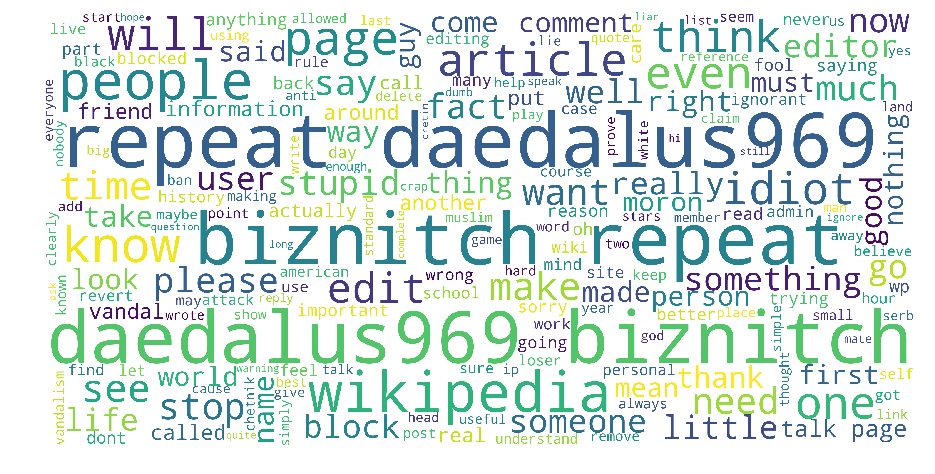

In [49]:
df_ins['comment_text']=df_ins['comment_text'].astype(str)
df_ins['comment_text']=df_ins['comment_text'].apply(lambda x:porter.stem(x))
df_ins['comment_text']=df_ins['comment_text'].apply(lambda x:lemmatizer.lemmatize(x))
ins_corpus=' '.join(df_ins['comment_text'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(ins_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [50]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

# identity_hate

In [51]:
df_id=df[(df['toxic']==0)&(df['severe_toxic']==0)&(df['obscene']==0)&(df['threat']==0)&(df['insult']==0)&(df['identity_hate']==1)]

In [52]:
df_id.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
3620,09b51ed1ee5e29a1,"Mate, sound like you are jewish\n\nGayness is ...",0,0,0,0,0,1
5839,0f9a7ba1acde6b6e,"it is obvius to, me, a black man, that orange ...",0,0,0,0,0,1
13201,22f28f593011019e,"The Israelis are committing massacres in Gaza,...",0,0,0,0,0,1
17279,2da09631a5e75737,"""\n\n How does it feel \n\nTo be a negress? Do...",0,0,0,0,0,1
29220,4d7a10ae7a7c7621,"""\n\n A hit list for Jews \nThere is a site ca...",0,0,0,0,0,1


In [53]:
df[(df['toxic']==0)&(df['severe_toxic']==0)&(df['obscene']==0)&(df['threat']==0)&(df['insult']==0)&(df['identity_hate']==0)]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0
10,0005300084f90edc,"""\nFair use rationale for Image:Wonju.jpg\n\nT...",0,0,0,0,0,0


In [54]:
df_id['comment_text'][3620]

'Mate, sound like you are jewish\n\nGayness is in the air'

In [55]:
df_id['comment_text']

3620      Mate, sound like you are jewish\n\nGayness is ...
5839      it is obvius to, me, a black man, that orange ...
13201     The Israelis are committing massacres in Gaza,...
17279     "\n\n How does it feel \n\nTo be a negress? Do...
29220     "\n\n A hit list for Jews \nThere is a site ca...
32790     " name was Willie, and he said he was standing...
33031     Gay comment \n\nWhere is the citation for M Ma...
34271     =WHY DO YOU HORDE DIAMONDS AND JEWLRY WHILE 1 ...
35024     I am sure that you are the SON of one of those...
40105     I hope you niggerfags realize that reverting m...
41631     Black americans have a hive mind mentality and...
42109     Why is your wiener so small? \n\nIt is because...
42432     "\n\n Image caption - Homosexual? \n\nThe seco...
45277     The facts: \n1. This is a blatant lie, as prov...
45290     Ossmann,are you  jew or your father was an SS ...
51983     http://www.thirdworldtraveler.com/Blum/Greece_...
54480     If this guy isnt gay he is one

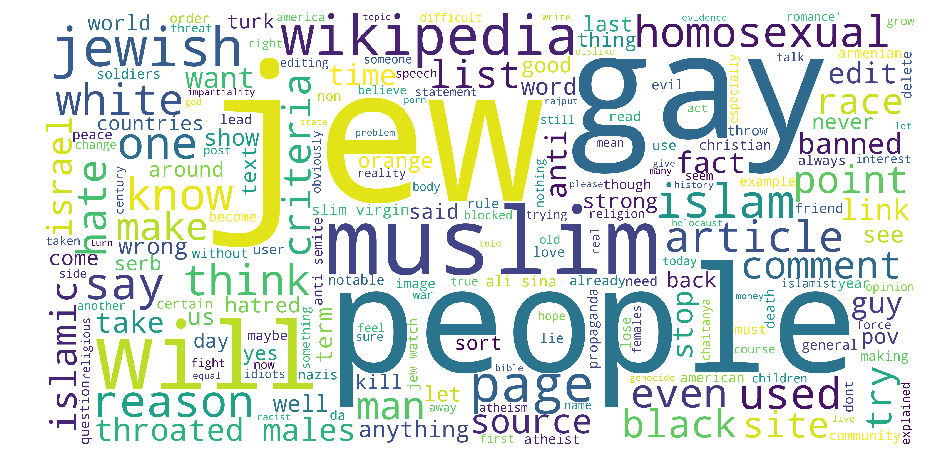

In [56]:
df_id['comment_text']=df_id['comment_text'].astype(str)
df_id['comment_text']=df_id['comment_text'].apply(lambda x:porter.stem(x))
df_id['comment_text']=df_id['comment_text'].apply(lambda x:lemmatizer.lemmatize(x))
id_corpus=' '.join(df_id['comment_text'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(id_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

So the comments which are leading it to become insulting are "jew,gay,muslim,jewish "etc kind of words.So here the religion, sexuality etc are being targetted.

In [57]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [58]:
doc = nlp(df['comment_text'][179])
spacy.displacy.render(doc, style='ent',jupyter=True)

In [59]:
from spacy.lang.en.stop_words import STOP_WORDS
punctuations = string.punctuation
stopwords = list(STOP_WORDS)


Lemmatization


In [60]:
review = str(" ".join([i.lemma_ for i in doc]))

In [61]:
doc = nlp(review)
spacy.displacy.render(doc, style='ent',jupyter=True)

In [62]:
for i in nlp(review):
    print(i,"=>",i.pos_)

REPLY => PROPN
above => ADV
: => PUNCT

  => SPACE
that => DET
be => AUX
-PRON- => ADJ
, => PUNCT
loser => NOUN
. => PUNCT
the => DET
UN => PROPN
define => VERB
Vietnam => PROPN
to => PART
be => AUX
part => NOUN
of => ADP
Southeast => PROPN
Asia => PROPN
. => PUNCT
and => CCONJ
far => ADV
as => SCONJ
-PRON- => PRON
know => VERB
Vietnam => PROPN
be => VERB
part => NOUN
of => ADP
ASEAN => PROPN
, => PUNCT
and => CCONJ
use => VERB
to => PART
be => AUX
part => NOUN
of => ADP
french => ADJ
Indochina => PROPN
with => ADP
Laos => PROPN
and => CCONJ
all => DET
those => DET
shit => NOUN
country => NOUN
anyway => ADV
-PRON- => PROPN
culture => NOUN
have => AUX
always => ADV
be => AUX
more => ADJ
influence => NOUN
by => ADP
SEA => NOUN
than => SCONJ
Han => PROPN
Chinese => PROPN
( => PUNCT
as => SCONJ
in => ADP
proper => ADJ
Yangtze => PROPN
Han => PROPN
Chinese => PROPN
, => PUNCT
not => PART
the => DET
fringe => NOUN
indigenous => ADJ
tribe => NOUN
in => ADP
Guangzhou => PROPN
/ => SYM
Guangxi 

In [63]:
from spacy.lang.en import English
parser = English()
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [64]:
from tqdm import tqdm
tqdm.pandas()
df['comment_text'] = df['comment_text'].progress_apply(spacy_tokenizer)

100%|█████████████████████████████████████████████████████████████████████████| 159571/159571 [05:28<00:00, 485.95it/s]


In [65]:
df['comment_text'][179]

'reply loser un defines vietnam southeast asia far know vietnam asean french indochina laos shit countries culture influenced sea han chinese proper yangtze han chinese fringe indigenous tribes guangzhou guangxi admit vietnamese bunch wannabe crap people east asian people spoken thinks vietnam integral sea think backward dirty speak horrible swearing language matter crap spout wikipedia change way people real world think'

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
# Creating a vectorizer
vectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(df['comment_text'])

In [67]:
NUM_TOPICS = 10

In [68]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
